In [1]:
import datajoint as dj
import numpy as np

In [2]:
schema = dj.schema('microns_pinky')
ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')
ndap100 = dj.create_virtual_module('ndap100','microns_ndap100')
pinky = dj.create_virtual_module("pinky","microns_pinky")
pinky_nda = dj.create_virtual_module("pinky_nda","microns_pinky_nda")


#getting the keys from the following three tables
key_source_pinky = (pinky.Mesh() & "segmentation=3") - pinky.AllenSoma & ( pinky_nda.Spike() & "segmentation=3")

Connecting celiib@10.28.0.34:3306


In [3]:
(key_source_pinky - pinky.Neurite)

segmentation segmentation id,segment_id segment id unique within each Segmentation,n_vertices number of vertices in this mesh,n_triangles number of triangles in this mesh,"vertices x,y,z coordinates of vertices",triangles triangles (triplets of vertices)
3,648518346341353058,111754,222198,=BLOB=,=BLOB=
3,648518346341353574,169648,336849,=BLOB=,=BLOB=
3,648518346341354313,131505,261279,=BLOB=,=BLOB=
3,648518346341355198,59818,118694,=BLOB=,=BLOB=
3,648518346341356256,908546,1806745,=BLOB=,=BLOB=
3,648518346341359123,248717,495526,=BLOB=,=BLOB=
3,648518346341360739,278231,553936,=BLOB=,=BLOB=


In [4]:
key_source_original = (ta3p100.Mesh() & "segmentation=2") - ta3p100.AllenSoma & ( ndap100.Spike() & "segmentation=2")
key_source_original

segmentation segmentation id,segment_id segment id unique within each Segmentation,n_vertices number of vertices in this mesh,n_triangles number of triangles in this mesh,"vertices x,y,z coordinates of vertices",triangles triangles (triplets of vertices)
2,648518346341353186,127896,254198,=BLOB=,=BLOB=
2,648518346341354006,442297,882121,=BLOB=,=BLOB=
2,648518346341354307,215769,430254,=BLOB=,=BLOB=
2,648518346341354370,1358076,2700932,=BLOB=,=BLOB=
2,648518346341356348,4477986,8918252,=BLOB=,=BLOB=
2,648518346341357297,651033,1294542,=BLOB=,=BLOB=
2,648518346341357700,402972,792152,=BLOB=,=BLOB=


In [ ]:
ta3p100.ProofreadLabelOrphan()

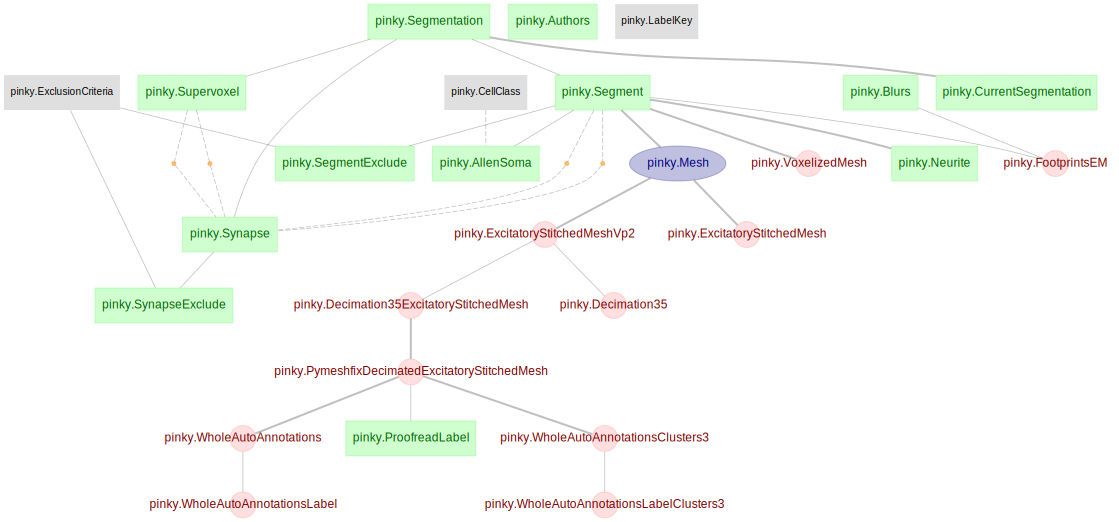

In [37]:
dj.ERD(pinky)

In [ ]:
key_source

In [ ]:
key_source & "n_vertices>5000"

In [ ]:
dj.ERD(schema)

# test to see if there is a size threshold for glia cells that were errored: 


In [12]:
ta3p100.ProofreadLabelOrphan()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,author_original name of last editor,author_proofreader name of last editor,date_time the last time it was edited,vertices label data for the vertices,triangles label data for the faces,edges label data for the edges,status the index of the status descriptor that can be references by the StatusKey
2,648518346341352006,0.35,computer_Auto,bcelii,2019-02-01 12:14:13,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341352223,0.35,computer_Auto,bcelii,2019-02-01 12:43:29,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353019,0.35,computer_Auto,bcelii,2019-02-01 12:43:55,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353186,0.35,computer_Auto,bcelii,2019-02-01 12:45:01,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353521,0.35,computer_Auto,bcelii,2019-02-01 12:45:50,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353574,0.35,computer_Auto,bcelii,2019-02-01 12:49:06,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353607,0.35,computer_Auto,bcelii,2019-02-01 12:51:13,=BLOB=,=BLOB=,=BLOB=,complete


In [13]:
(key_source_original - ta3p100.CompartmentOrphan() )

segmentation segmentation id,segment_id segment id unique within each Segmentation,n_vertices number of vertices in this mesh,n_triangles number of triangles in this mesh,"vertices x,y,z coordinates of vertices",triangles triangles (triplets of vertices)
2,648518346341354006,442297,882121,=BLOB=,=BLOB=
2,648518346341354307,215769,430254,=BLOB=,=BLOB=
2,648518346341354370,1358076,2700932,=BLOB=,=BLOB=
2,648518346341356348,4477986,8918252,=BLOB=,=BLOB=
2,648518346341357700,402972,792152,=BLOB=,=BLOB=
2,648518346341357855,237744,473126,=BLOB=,=BLOB=
2,648518346341366545,45749,91224,=BLOB=,=BLOB=


In [14]:
proofread_missing =  ta3p100.ProofreadLabelOrphan & (key_source_original - ta3p100.CompartmentOrphan() ).proj()

In [15]:
proofread_missing

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,author_original name of last editor,author_proofreader name of last editor,date_time the last time it was edited,vertices label data for the vertices,triangles label data for the faces,edges label data for the edges,status the index of the status descriptor that can be references by the StatusKey
2,648518346341354006,0.35,computer_Auto,bcelii,2019-02-11 10:17:55,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341354307,0.35,computer_Auto,bcelii,2019-02-06 12:51:09,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341354370,0.35,computer_Auto,bcelii,2019-02-06 12:52:31,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341356348,0.35,computer_Auto,bcelii,2019-02-06 12:56:19,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341357700,0.35,computer_Auto,bcelii,2019-02-06 13:09:35,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341357855,0.35,computer_Auto,bcelii,2019-02-06 13:09:47,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341366545,0.35,computer_Auto,bcelii,2019-02-06 13:33:13,=BLOB=,=BLOB=,=BLOB=,complete


In [28]:
traingles = proofread_missing.fetch("triangles")

for tri in traingles:
    print("n_triangles = " + str(len(tri)) + " number of error faces = " + str((len(np.where(tri == 10)[0]))/len(tri)))

n_triangles = 305035 number of error faces = 1.0
n_triangles = 149374 number of error faces = 0.8497663582685072
n_triangles = 924089 number of error faces = 1.0
n_triangles = 3019844 number of error faces = 1.0
n_triangles = 270320 number of error faces = 0.0406999112163362
n_triangles = 165320 number of error faces = 0.0
n_triangles = 31859 number of error faces = 1.0
n_triangles = 720459 number of error faces = 1.0
n_triangles = 517957 number of error faces = 1.0
n_triangles = 213766 number of error faces = 1.0
n_triangles = 2236877 number of error faces = 1.0
n_triangles = 2508447 number of error faces = 1.0
n_triangles = 82181 number of error faces = 0.15248050035896374
n_triangles = 344426 number of error faces = 1.0
n_triangles = 1997952 number of error faces = 1.0
n_triangles = 89577 number of error faces = 0.08350357792736975
n_triangles = 88070 number of error faces = 0.7617463381401158
n_triangles = 370695 number of error faces = 1.0
n_triangles = 321576 number of error face

In [26]:
ex_tri = traingles[0]
print((len(np.where(ex_tri == 10)[0]))/len(ex_tri))

1.0


In [30]:
ta3p100.DecimationOrphan()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,n_vertices,n_triangles,vertices,triangles
2,648518346341352006,0.35,32107,64022,=BLOB=,=BLOB=
2,648518346341352223,0.35,39145,77867,=BLOB=,=BLOB=
2,648518346341353019,0.35,8809,17594,=BLOB=,=BLOB=
2,648518346341353186,0.35,44780,88967,=BLOB=,=BLOB=
2,648518346341353521,0.35,7325,14339,=BLOB=,=BLOB=
2,648518346341353574,0.35,59341,117923,=BLOB=,=BLOB=
2,648518346341353607,0.35,68762,136431,=BLOB=,=BLOB=


In [32]:
ta3p100.ProofreadLabelOrphan() & "status='complete'"

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,author_original name of last editor,author_proofreader name of last editor,date_time the last time it was edited,vertices label data for the vertices,triangles label data for the faces,edges label data for the edges,status the index of the status descriptor that can be references by the StatusKey
2,648518346341352006,0.35,computer_Auto,bcelii,2019-02-01 12:14:13,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341352223,0.35,computer_Auto,bcelii,2019-02-01 12:43:29,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353019,0.35,computer_Auto,bcelii,2019-02-01 12:43:55,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353186,0.35,computer_Auto,bcelii,2019-02-01 12:45:01,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353521,0.35,computer_Auto,bcelii,2019-02-01 12:45:50,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353574,0.35,computer_Auto,bcelii,2019-02-01 12:49:06,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341353607,0.35,computer_Auto,bcelii,2019-02-01 12:51:13,=BLOB=,=BLOB=,=BLOB=,complete


In [35]:
(ta3p100.ProofreadLabelOrphan() & "status='complete'") & ta3p100.SegmentExclude() & proofread_missing.proj()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,author_original name of last editor,author_proofreader name of last editor,date_time the last time it was edited,vertices label data for the vertices,triangles label data for the faces,edges label data for the edges,status the index of the status descriptor that can be references by the StatusKey
2,648518346341354006,0.35,computer_Auto,bcelii,2019-02-11 10:17:55,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341354307,0.35,computer_Auto,bcelii,2019-02-06 12:51:09,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341354370,0.35,computer_Auto,bcelii,2019-02-06 12:52:31,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341356348,0.35,computer_Auto,bcelii,2019-02-06 12:56:19,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341357700,0.35,computer_Auto,bcelii,2019-02-06 13:09:35,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341357855,0.35,computer_Auto,bcelii,2019-02-06 13:09:47,=BLOB=,=BLOB=,=BLOB=,complete
2,648518346341366545,0.35,computer_Auto,bcelii,2019-02-06 13:33:13,=BLOB=,=BLOB=,=BLOB=,complete


In [40]:
pinky.Decimation35.describe()

-> pinky.ExcitatoryStitchedMeshVp2
decimation_ratio     : decimal(3,2)                 
---
n_vertices           : bigint                       
n_triangles          : bigint                       
vertices             : longblob                     
triangles            : longblob                     



'-> pinky.ExcitatoryStitchedMeshVp2\ndecimation_ratio     : decimal(3,2)                 \n---\nn_vertices           : bigint                       \nn_triangles          : bigint                       \nvertices             : longblob                     \ntriangles            : longblob                     \n'

In [ ]:
"""
Conclusion:
Mesh --> Decimation (none eliminated)
Decimation --> Proofreading (none eliminated)
Proofreading --> Coarse (those in segment exclude eliminated)


"""